In [ ]:
# G4_13
# 3IIR - G4
# AMMOR DOHA / ACHQIR KHADIJA / AQADDAR MARIEME
# Amazon

In [ ]:
#pour importer les packages
import numpy as np
import io
import pandas as pd
#pour la visualisation
import matplotlib.pyplot as plt
import seaborn as sns
#pour la question des contenus similaires
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [ ]:
#ouvrir la base de données
#df pour dataframe nom de base données
#pd pour pandas et fonction read pour lire le fichier de databse de type csv
#et le chemin de la database entre parentheses
from google.colab  import files
uploaded = files.upload()


Saving amazon.csv to amazon.csv


In [ ]:
df = pd.read_csv(io.BytesIO(uploaded['amazon.csv']))
print(df)

     show_id     type                    title         director  \
0         s1    Movie      The Grand Seduction     Don McKellar   
1         s2    Movie     Take Care Good Night     Girish Joshi   
2         s3    Movie     Secrets of Deception      Josh Webber   
3         s4    Movie       Pink: Staying True   Sonia Anderson   
4         s5    Movie            Monster Maker     Giles Foster   
...      ...      ...                      ...              ...   
9663   s9664    Movie      Pride Of The Bowery  Joseph H. Lewis   
9664   s9665  TV Show            Planet Patrol              NaN   
9665   s9666    Movie                  Outpost     Steve Barker   
9666   s9667  TV Show  Maradona: Blessed Dream              NaN   
9667   s9668    Movie              Harry Brown    Daniel Barber   

                                                   cast         country  \
0        Brendan Gleeson, Taylor Kitsch, Gordon Pinsent          Canada   
1      Mahesh Manjrekar, Abhay Mahajan, Sachi

In [ ]:
#informations par rapport aux colonnes
df.info()
#pour object il faut modifier pour faire des calculs puisque c'est pas numerique

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9668 entries, 0 to 9667
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       9668 non-null   object
 1   type          9668 non-null   object
 2   title         9668 non-null   object
 3   director      7585 non-null   object
 4   cast          8435 non-null   object
 5   country       672 non-null    object
 6   date_added    155 non-null    object
 7   release_year  9668 non-null   int64 
 8   rating        9331 non-null   object
 9   duration      9668 non-null   object
 10  listed_in     9668 non-null   object
 11  description   9668 non-null   object
dtypes: int64(1), object(11)
memory usage: 906.5+ KB


In [ ]:
#pour les variables numeriques
df.describe()

,release_year
count,9668.000000
mean,2008.341849
std,18.922482
min,1920.000000
25%,2007.000000
50%,2016.000000
75%,2019.000000
max,2021.000000


nettoyage de données

In [ ]:
#pour savoir si on a des lignes repetées on utilise la fct duplicated
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
9663    False
9664    False
9665    False
9666    False
9667    False
Length: 9668, dtype: bool

In [ ]:
#pour savoir si on a des lignes repetées on utilise la fct duplicated et sum pour la somme
df.duplicated().sum()

0

In [ ]:
#pour supprimer les lignes repetées si jamais
#inplace=True pour que ce soit modifier dans la database aussi
df.drop_duplicates(inplace=True)

In [ ]:
#pour decouvrire les valeurs manquantes
#is null est une fonction de pandas
df.isnull().sum()
#ici par exemple on a 2082 films sans directeurs
#ou encore 337 films sans ratings

show_id            0
type               0
title              0
director        2083
cast            1233
country         8996
date_added      9513
release_year       0
rating           337
duration           0
listed_in          0
description        0
dtype: int64

In [ ]:
#pour afficher les titres des colonnes
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

Analyse exploratoire


In [ ]:
#pour valeurs numeriques
#moyenne d'une colonne par exemple la colonne release year parce que c'est elle qu'est en numerique
df['release_year'].mean()

2008.3418494000828

In [ ]:
#pour savoir combien de films on a pour chaque type
#ici on remarque que on a que deux types qui sont Movie et TV Show
df['type'].value_counts()

type
Movie      7814
TV Show    1854
Name: count, dtype: int64

In [ ]:
#meme chose pour country on veut savoir combien de films a ete realise dans quel pays
df['country'].value_counts()

country
United States                            253
India                                    229
United Kingdom                            28
Canada                                    16
United Kingdom, United States             12
                                        ... 
United States, Germany, Brazil, Italy      1
South Africa                               1
Australia, United States, Germany          1
Germany, Austria, United States            1
Italy, Spain                               1
Name: count, Length: 86, dtype: int64

<Axes: ylabel='Frequency'>

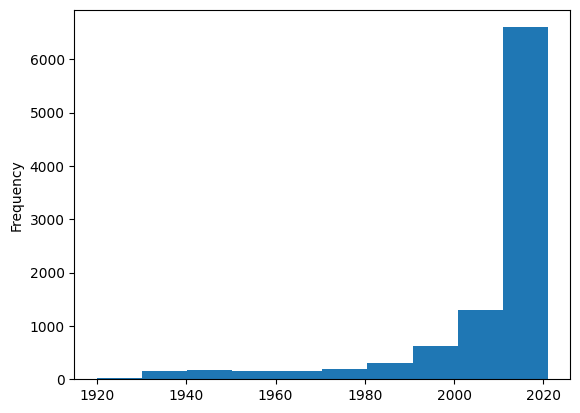

In [ ]:
df['release_year'].plot(kind='hist')

In [ ]:
#pour compter le nombre d'occurrences de chaque réalisateur
directors_count = df["director"].value_counts()

#et ici l'affichage des 5 premiers réalisateurs les plus populaires
top_directors = directors_count.head(5)
print(top_directors)

director
Mark Knight              113
Cannis Holder             61
Moonbug Entertainment     37
Jay Chapman               34
Arthur van Merwijk        30
Name: count, dtype: int64


In [ ]:
#pour compter le nombre d'occurrences de chaque categorie
categories_count = df["listed_in"].value_counts()

#afficher les 5 premiers categories les plus populaires
top_categories = categories_count.head(5)
print(top_categories)

listed_in
Drama              986
Comedy             536
Drama, Suspense    399
Comedy, Drama      377
Animation, Kids    356
Name: count, dtype: int64


In [ ]:
#compter le nombre d'occurrences de chaque acteur
actors_count = df["cast"].str.split(",", expand=True).stack().str.strip().value_counts()

#afficher les 10 premiers acteurs les plus populaires
top_actors = actors_count.head(10)
print(top_actors)


Maggie Binkley        56
1                     35
Gene Autry            32
Nassar                30
Champion              29
Anne-Marie Newland    25
Prakash Raj           24
Roy Rogers            23
John Wayne            23
Danny Trejo           22
Name: count, dtype: int64


In [ ]:
#extraire les séries TV du DataFrame
tv_shows = df[df["type"] == "TV Show"]

#trier les séries TV par nombre de saisons
tv_shows_sorted = tv_shows.sort_values("duration", ascending=False)

#afficher les cinq séries TV avec le plus grand nombre de saisons
top_5_tv_shows = tv_shows_sorted.head(5)
print("Les cinq meilleures séries télévisées avec le plus grand nombre de saisons :")
print(top_5_tv_shows[["show_id","title", "duration"]])

Les cinq meilleures séries télévisées avec le plus grand nombre de saisons :
     show_id         title   duration
800     s801     Teen Wolf  9 Seasons
185     s186       Vikings  9 Seasons
1081   s1082        Scrubs  9 Seasons
3571   s3572  'Allo 'Allo!  9 Seasons
867     s868         Suits  9 Seasons


In [ ]:
#créer un vecteur de caractéristiques pour les descriptions des contenus
vectorizer = CountVectorizer(stop_words='english')
features = vectorizer.fit_transform(df['description'].fillna(''))

#calculer la similarité cosinus entre chaque paire de contenus
cosine_sim = cosine_similarity(features)

#trouver les contenus similaires à "The Grand Seduction"
title = "The Grand Seduction"
index = df[df['title'] == title].index[0]
similar_content = list(enumerate(cosine_sim[index]))
sorted_similar_content = sorted(similar_content,key=lambda x:x[1],reverse=True)[1:10]

#afficher les contenus similaires
print("Contenus similaires à ", title)
for content in sorted_similar_content:
    print(df.iloc[content[0]]['title'])

Contenus similaires à  The Grand Seduction
Mango Dreams
Doctor Blood's Coffin
Kadaram Kondan
Mobutu's African Movie Theater: Episode 5
Chittibabu
Oru Kai Osai
Thartharat
The North Star
Invasion of the Body Snatchers


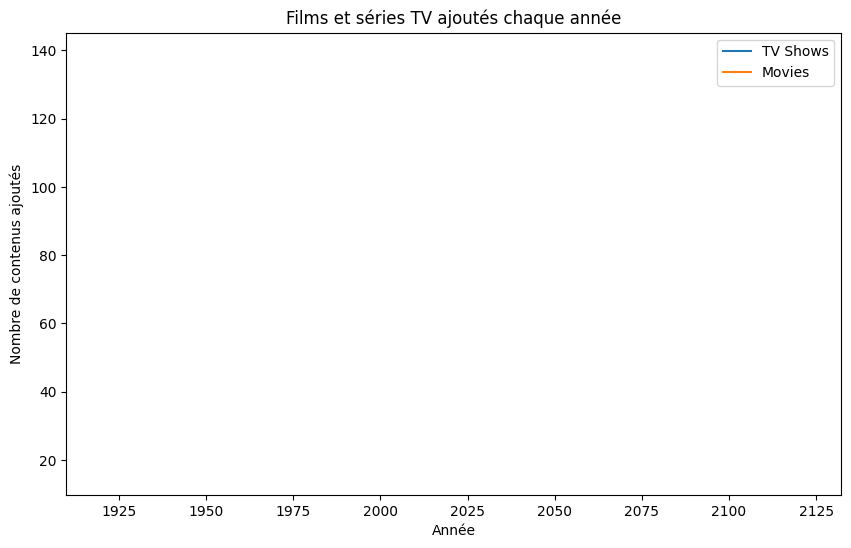

In [ ]:
#comparer le nombre de films et de séries TV ajoutés chaque année
df['year_added'] = pd.DatetimeIndex(df['date_added']).year
tv_shows_added = df[df["type"] == "TV Show"].groupby('year_added').size()
movies_added = df[df["type"] == "Movie"].groupby('year_added').size()

#tracer un graphique pour comparer le nombre de films et de séries TV ajoutés chaque année
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(tv_shows_added.index, tv_shows_added.values, label='TV Shows')
ax.plot(movies_added.index, movies_added.values, label='Movies')
ax.set_title('Films et séries TV ajoutés chaque année')
ax.set_xlabel('Année')
ax.set_ylabel('Nombre de contenus ajoutés')
ax.legend()
plt.show()

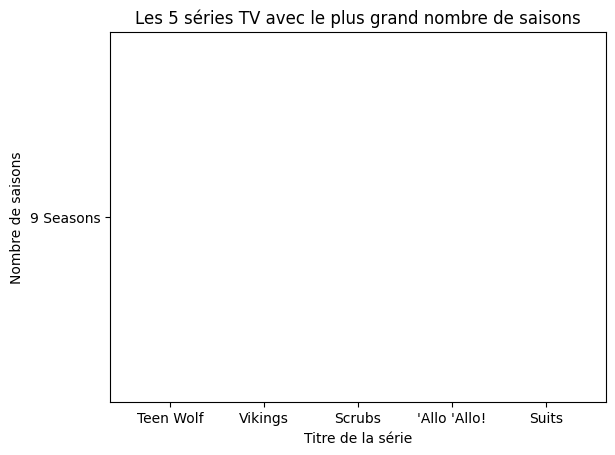

In [ ]:
#sélectionner les données pour les séries TV uniquement
tv_shows = df[df["type"] == "TV Show"]

#trier les séries TV par nombre de saisons décroissant
sorted_tv_shows = tv_shows.sort_values("duration", ascending=False)

#extraire les 5 séries TV avec le plus grand nombre de saisons
top_tv_shows = sorted_tv_shows.head(5)

#afficher un diagramme à barres pour les 5 séries TV avec le plus grand nombre de saisons
plt.bar(top_tv_shows["title"], top_tv_shows["duration"])
plt.title("Les 5 séries TV avec le plus grand nombre de saisons")
plt.xlabel("Titre de la série")
plt.ylabel("Nombre de saisons")
plt.show()